<a href="https://colab.research.google.com/github/Adiboy77/YCSA/blob/main/SidemenYCSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/MyDrive/")

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")

In [6]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [7]:
ls

 101903063_classification.ipynb
 101903063-data.csv
'101903063-result-1 (1).csv'
'101903063-result-1 (2).csv'
 101903063-result-1.csv
 101903063-result-2.csv
 101903063_topsis.py
'adi_cv2-converted (1).pdf'
 adityaKaggle.csv
'Aditya_Resume04 (1).pdf'
 Aditya_Resume04.pdf
'Aditya Vikram Tiwari (1).png'
'Aditya Vikram Tiwari.png'
'AdityaVikramTiwari_ThaparInstituteOfEngineering&Technology.jpeg'
'Colab Notebooks'/
'Copy of Untitled form.gform'
 dowhile.c
'eCode_Security Pledge Form(1)-converted-converted.pdf'
'Getting started.pdf'
 kjdfkjnfd.gdoc
'Lecture -13_BJT-Part2_Biasing-updated-01May (1).pdf'
'Lecture -13_BJT-Part2_Biasing-updated-01May.pdf'
 Lecture-1_Semiconductor_Part1a.ppt
'Links for video lectures (1).docx'
'Links for video lectures.docx'
 MO14TU_ADITYA.pdf
 outAss3.txt
'PI 2.gslides'
'PROFF COMM PRESENTATION (1) (1).pptx'
 Responses.gsheet
'resume-f86734 (1).pdf'
 resume-f86734.pdf
 Sidemen.gsheet
'Sidemen - Sheet2.csv'
'Untitled document (1).gdoc'
'Untitled document.gdoc'
'U

In [8]:
data = pd.read_csv("Sidemen - Sheet2.csv")

In [9]:
data.head()

,Name,Comment,Time,Likes,Reply Count
0,Modzfordayz,"<a href=""https://www.youtube.com/watch?v=DUrBI...",2022-07-06T11:46:56Z,0,0
1,unknown,Damn this funny as helllll🤣🤣🤣🤣<br>Please do a ...,2022-07-06T10:52:53Z,0,0
2,J2k,Whos the girl in the blue jacket and skirt wer...,2022-07-06T09:34:26Z,0,0
3,Krishna Marandi,Best date🤯 in dating history,2022-07-06T09:10:51Z,0,0
4,Zoro Unik,This one is epic,2022-07-06T08:56:06Z,0,0


In [10]:
data.shape

(25665, 5)

In [11]:
data['polarity'] = data['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [12]:
data.head

<bound method NDFrame.head of                                           Name  \
0                                  Modzfordayz   
1                                      unknown   
2                                          J2k   
3                              Krishna Marandi   
4                                    Zoro Unik   
...                                        ...   
25660                                  BingoKW   
25661                            George carder   
25662                                ForeverF1   
25663                            Natsquirrel12   
25664  I’m SUBBING to EVERYONE who SUBBS to ME   

                                                 Comment  \
0      <a href="https://www.youtube.com/watch?v=DUrBI...   
1      Damn this funny as helllll🤣🤣🤣🤣<br>Please do a ...   
2      Whos the girl in the blue jacket and skirt wer...   
3                           Best date🤯 in dating history   
4                                       This one is epic   
...      

# Shuffling the dataset

In [13]:
data = data.sample(frac=1).reset_index(drop=True)

In [14]:
data['pol_cat']  = 0

Continuous to categorical

In [15]:
# data['pol_cat'][data.polarity == 0] = 0
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1

In [16]:
data.head()

,Name,Comment,Time,Likes,Reply Count,polarity,pol_cat
0,Eduardo Visbal,Barranquilla is actually a city in Colombia 😂😂...,2022-05-30T10:46:27Z,0,0,0.1,1
1,Crustynutzzzz,This video is an hour and 12 mins of w2s cring...,2022-05-30T07:45:13Z,2,0,0.0,-1
2,Dat1-mexicanboi,💀,2022-05-29T20:01:35Z,0,0,0.0,-1
3,Polo g Fan,"<a href=""https://www.youtube.com/watch?v=DUrBI...",2022-05-30T01:24:36Z,0,0,0.0,-1
4,imdave,Who tf did shorddys makeup @1 hour and 3 minut...,2022-06-05T19:12:49Z,0,0,0.0,-1


In [17]:
data['pol_cat'].value_counts()

-1    16075
 1     9590
Name: pol_cat, dtype: int64

Creating separate dataframes for Negative,Positive & Neutral comments

In [18]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

# data_neutral = data[data['pol_cat'] == 0]
# data_neutral = data_neutral.reset_index(drop = True)

In [19]:
data_pos.head()

,Name,Comment,Time,Likes,Reply Count,polarity,pol_cat
0,Eduardo Visbal,Barranquilla is actually a city in Colombia 😂😂...,2022-05-30T10:46:27Z,0,0,0.100000,1
1,Alex Russell,JJ providing the ideas is so underrated this v...,2022-06-03T05:03:15Z,0,0,0.200000,1
2,NexT NaDe,This was literally the funniest video i have w...,2022-05-29T20:55:46Z,1,0,0.084375,1
3,Waheeb Said,HP and Filly is the best duo ever😤,2022-05-29T20:50:12Z,0,0,1.000000,1
4,Nikolas Silva,This was hilarious and hard to watch I love it...,2022-06-02T13:43:18Z,3,0,0.236111,1


In [20]:
data_pos.shape

(9590, 7)

In [21]:
data_neg.head()

,Name,Comment,Time,Likes,Reply Count,polarity,pol_cat
0,Crustynutzzzz,This video is an hour and 12 mins of w2s cring...,2022-05-30T07:45:13Z,2,0,0.0,-1
1,Dat1-mexicanboi,💀,2022-05-29T20:01:35Z,0,0,0.0,-1
2,Polo g Fan,"<a href=""https://www.youtube.com/watch?v=DUrBI...",2022-05-30T01:24:36Z,0,0,0.0,-1
3,imdave,Who tf did shorddys makeup @1 hour and 3 minut...,2022-06-05T19:12:49Z,0,0,0.0,-1
4,Noora Alhajri,"girl in the blue dress has my heart <a href=""h...",2022-06-03T18:38:27Z,0,0,0.0,-1


In [22]:
data_neg['Comment'][40]

'Sheeesh'

-1    16075
 1     9590
Name: pol_cat, dtype: int64

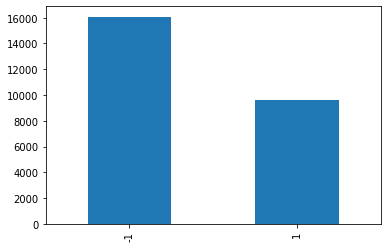

In [23]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

# Data Preprocessing

Lower casing the text in comments

In [24]:
data['Comment'] = data['Comment'].str.lower()

In [25]:
data['Comment'].head()

0    barranquilla is actually a city in colombia 😂😂...
1    this video is an hour and 12 mins of w2s cring...
2                                                    💀
3    <a href="https://www.youtube.com/watch?v=durbi...
4    who tf did shorddys makeup @1 hour and 3 minut...
Name: Comment, dtype: object

In [26]:
data.describe()

,Likes,Reply Count,polarity,pol_cat
count,25665.000000,25665.000000,25665.000000,25665.000000
mean,26.502513,0.168712,0.149461,-0.252679
std,698.800412,2.548069,0.347998,0.967569
min,0.000000,0.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,-1.000000
75%,1.000000,0.000000,0.300000,1.000000
max,79684.000000,337.000000,1.000000,1.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25665 entries, 0 to 25664
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         25664 non-null  object 
 1   Comment      25665 non-null  object 
 2   Time         25665 non-null  object 
 3   Likes        25665 non-null  int64  
 4   Reply Count  25665 non-null  int64  
 5   polarity     25665 non-null  float64
 6   pol_cat      25665 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.4+ MB


In [28]:
data['Comment'][0]

'barranquilla is actually a city in colombia 😂😂 i think filly really likes to mention it for everything'

In [29]:
data['Comment'][0].strip()

'barranquilla is actually a city in colombia 😂😂 i think filly really likes to mention it for everything'

In [30]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [33]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
stop_words = set(stopwords.words('english'))

In [35]:
data['Comment'] = data['Comment'].str.strip()

In [36]:
train = data.copy()

In [37]:
train['Comment'] = train['Comment'].str.strip()

In [38]:
train['Comment'][0]

'barranquilla is actually a city in colombia 😂😂 i think filly really likes to mention it for everything'

In [39]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [40]:
data['stop_comments'] = data['Comment'].apply(lambda x : remove_stopwords(x))

In [41]:
data.head()

,Name,Comment,Time,Likes,Reply Count,polarity,pol_cat,stop_comments
0,Eduardo Visbal,barranquilla is actually a city in colombia 😂😂...,2022-05-30T10:46:27Z,0,0,0.1,1,barranquilla actually city colombia 😂😂 think f...
1,Crustynutzzzz,this video is an hour and 12 mins of w2s cring...,2022-05-30T07:45:13Z,2,0,0.0,-1,video hour 12 mins w2s cringing 😂
2,Dat1-mexicanboi,💀,2022-05-29T20:01:35Z,0,0,0.0,-1,💀
3,Polo g Fan,"<a href=""https://www.youtube.com/watch?v=durbi...",2022-05-30T01:24:36Z,0,0,0.0,-1,< href= '' https : //www.youtube.com/watch ? v...
4,imdave,who tf did shorddys makeup @1 hour and 3 minut...,2022-06-05T19:12:49Z,0,0,0.0,-1,tf shorddys makeup @ 1 hour 3 minutes face col...


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [44]:
X_train.shape

(20532,)

In [45]:
X_test.shape

(5133,)

In [46]:
data['pol_cat'].value_counts()

-1    16075
 1     9590
Name: pol_cat, dtype: int64

# Applying Logistic Regression

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [49]:
tf_train.shape

(20532, 10122)

Printing the Vocabulary

In [50]:
print(vect.vocabulary_)

{'wan': 9579, 'na': 6507, 'see': 7995, 'chunkz': 2706, 'gib': 4565, 'vs': 9531, '20': 429, 'ngl': 6610, 'side': 8171, 'plus': 7228, 'rn': 7795, 'get': 4546, 'membership': 6267, 'jj': 5527, 'motive': 6446, 'behind': 2067, 'questions': 7497, 'br': 2286, 'pinero': 7150, 'filly': 4171, 'carried': 2527, 'icl': 5232, 'got': 4687, 'best': 2094, 'one': 6816, 'funny': 4440, 'selena': 8012, 'anything': 1700, 'salinas': 7886, 'made': 6110, 'video': 9451, 'yesssss': 9975, 'veen': 9410, 'waiting': 9558, 'sidemen': 8178, 'ever': 3875, 'shout': 8139, 'exceeded': 3906, 'expectations': 3930, 'man': 6145, 'legend': 5771, 'funniest': 4436, 'ive': 5462, 'seen': 8003, 'ages': 1529, 'dont': 3538, 'think': 8932, 'destini': 3383, 'shoe': 8117, 'fit': 4235, 'yet': 9990, 'bring': 2330, 'namee': 6531, '39': 881, 'name': 6529, 'purple': 7459, 'girl': 4579, 'far': 4010, 'say': 7925, 'href': 5162, 'https': 5169, 'www': 9863, 'youtube': 10046, 'com': 2840, 'watch': 9605, 'durbixb1q0o': 3631, 'amp': 1657, '46m48s': 1

In [51]:
vocab = vect.vocabulary_

In [52]:
# for key,value in vocab.items():
#     if(value == 162):
#         print(key)

Importing the logistic regression classifer and fitting on the training dataset

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

# Accuracy Scores, Confusion Matrix & F1 Score

Accuracy score on training dataset

In [54]:
lr.score(tf_train,y_train)

0.9634716540035068

Accuracy score on test dataset i.e got from the splitting

In [55]:
lr.score(tf_test,y_test)

0.9470095460744204

Make predictions on the test dataset i.e. unseen data to the model

In [56]:
expected = y_test
predicted = lr.predict(tf_test)

Plotting confusion matrix for the test dataset

In [57]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [58]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[[1739  195]
 [  77 3122]]


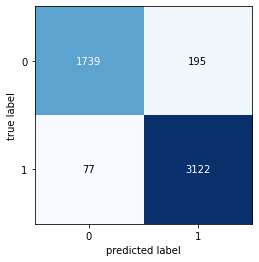

In [59]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

Precision, Recall, F1-score, Support for -1 & 1. 
Accuracy, macro average & weighted average.

In [60]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.94      0.98      0.96      3199
           1       0.96      0.90      0.93      1934

    accuracy                           0.95      5133
   macro avg       0.95      0.94      0.94      5133
weighted avg       0.95      0.95      0.95      5133



F1 Score

In [61]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.9428616329036219